In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
#load data
data=np.load("ch7_data.npz")
X_train=data["X_train"]
T_train=data["T_train"]
X_test=data["X_test"]
T_test=data["T_test"]
X0_min=data["X0_min"]
X0_max=data["X0_max"]
X1_min=data["X1_min"]
X1_max=data["X1_max"]

In [3]:
#dataの図示
def show_data(x,t):
    K=t.shape[1]
    col=["gray","white","black"]
    for k in range(K):
        plt.plot(
            x[t[:,k]==1,0],x[t[:,k]==1,1],col[k],
            marker="o",linestyle="None",
            markeredgecolor="black",alpha=0.8,
        )
    plt.xlim(X0_min,X0_max)
    plt.ylim(X1_min,X1_max)

In [8]:
import tensorflow
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tensorflow.random.set_seed(seed=0)
#sequential model
model=Sequential()#(A)
model.add(Dense(units=2,input_dim=2,activation="sigmoid"))#(B)
model.add(Dense(units=3,activation="softmax"))#(C)
#学習方法の設定(compileの意味は機械語に翻訳する)
sgd=SGD(learning_rate=0.5)#(D)
model.compile(#(E)
    optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
#↑は最適化はsgdという勾配法を損失関数は交差エントロピー誤差を
#評価する指標としてmetrics=accuracyを
#学習
start_time=time.time()
history=model.fit(#(F)
    X_train,T_train,
    epochs=1000,batch_size=100,verbose=0,
    validation_data=(X_test,T_test),
)
#evaluation model
score=model.evaluate(X_test,T_test,verbose=0)#G
calaculation_time=time.time()-start_time
#result
print(f"cross entropy{score[0]:.2f},accuracy{score[1]:.2f}")
print(f"Calculation time:{calaculation_time:.2f}sec")

cross entropy0.27,accuracy0.89
Calculation time:22.34sec


バージョンの違いか分からないが
教科書より交差エントロピー誤差、正答率がよい

113/113 [==============================] - 0s 787us/step


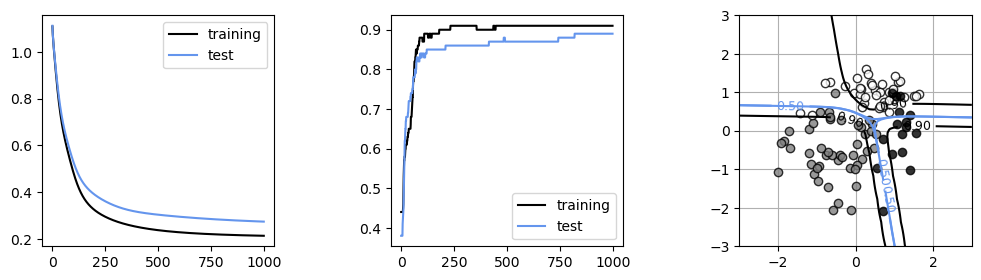

In [9]:
plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace=0.5)
#学習曲線表示
plt.subplot(1,3,1)
#(A)
plt.plot(history.history["loss"],"black",label="training")
#(B)
plt.plot(history.history["val_loss"],"cornflowerblue",label="test")
plt.legend()
#精度表示
plt.subplot(1,3,2)
plt.plot(history.history["accuracy"],"black",label="training")
plt.plot(history.history["val_accuracy"],"cornflowerblue",label="test")
plt.legend()
#境界線表示
plt.subplot(1,3,3)
show_data(X_test,T_test)
x0_n,x1_n=60,60
x0=np.linspace(X0_min,X0_max,x0_n)
x1=np.linspace(X1_min,X1_max,x1_n)
xx0,xx1=np.meshgrid(x0,x1)
x=np.c_[xx0.reshape(-1),xx1.reshape(-1)]
y=model.predict(x)#モデルはオブジェクト
#等高線表示
K=3
for ic in range(K):
    f=y[:,ic]
    f=f.reshape(x1_n,x0_n)
    cont=plt.contour(
        xx0,xx1,f,
        levels=[0.5,0.9],colors=["cornflowerblue","black"],
    )
    cont.clabel(fmt="%.2f",fontsize=9)
    plt.xlim(X0_min,X0_max)
    plt.ylim(X1_min,X1_max)
plt.grid()
plt.show()